# Planning the Project
### The Covid-19 event has been a very troubling time for all of us around the world. Due to this, I plan to use this project to conduct a study on the amount of people getting vaccinated and leverage off fear that some people have about the virus. With this I hope to share this with family members and close friends that getting fully vaccinated is one step closer to helping combat the virus.

## Questions worth discovering
#### - How has the Covid Vaccination Process progressed throughout the year?
#### - What does the total vaccination progress for certain countries look like? i.e U.S, Mexico, Canada, China, UK, etc.
#### -What does the daily vaccination progress look like for certain countries?

## Loading in libraries/modules

In [1]:
#imports all the libraries needed for the data cleaning and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reads in the csv file and puts the data in a dataframe
vaccine_data = pd.read_csv(r"C:\Users\delva\OneDrive\Desktop\Data Science\Projects\datasets\country_vaccinations.csv")
US_covid_cases = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

## Data Pre-Processing
### Getting a glimpse of the data

In [3]:
#Gives a quick description of the data
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.794600e+04,3.600500e+04,3.324900e+04,3.102800e+04,7.194600e+04,37946.000000,36005.000000,33249.000000,71946.000000
mean,3.716389e+07,1.474947e+07,1.086615e+07,2.779412e+05,1.380304e+05,68.334834,37.015007,31.026356,3469.935132
std,1.887931e+08,5.883567e+07,4.488201e+07,1.260971e+06,8.170834e+05,60.242876,28.326786,27.089799,4106.454043
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.338678e+05,2.952590e+05,1.882380e+05,5.350000e+03,9.820000e+02,11.740000,8.800000,4.820000,681.000000
50%,2.862344e+06,1.822343e+06,1.265305e+06,2.661150e+04,7.947000e+03,54.070000,34.730000,24.660000,2275.000000
75%,1.360792e+07,7.255645e+06,5.786627e+06,1.273820e+05,4.552475e+04,116.880000,63.250000,55.840000,5050.000000
max,2.968121e+09,1.265034e+09,1.224450e+09,2.474100e+07,2.242429e+07,327.790000,122.690000,120.700000,117497.000000


In [4]:
#checks the shape of the data 
vaccine_data.shape

(72312, 15)

In [5]:
#Prints the first few rows from the dataset
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [6]:
vaccine_data['country'].value_counts()

Latvia              416
Denmark             416
Norway              415
United States       407
China               405
                   ... 
Saint Helena         92
Burundi              87
Pitcairn             85
Falkland Islands     67
Niue                 43
Name: country, Length: 223, dtype: int64

In [7]:
#Shows percentage of how many missing values are in each column.
vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.475246
people_vaccinated                      0.502088
people_fully_vaccinated                0.540201
daily_vaccinations_raw                 0.570915
daily_vaccinations                     0.005061
total_vaccinations_per_hundred         0.475246
people_vaccinated_per_hundred          0.502088
people_fully_vaccinated_per_hundred    0.540201
daily_vaccinations_per_million         0.005061
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

## Data Cleaning 
### Creating new dataframes with subdata for different topics of interest

In [8]:
#Drops the missing values in the dataframe
clean_vaccine_data = vaccine_data.dropna()

#Checks to see if the above line worked (it did)
clean_vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [9]:
#This line puts two columns in dataframe and drops rows with NA values.
sub_data = clean_vaccine_data[["country","date","total_vaccinations"]]

print(sub_data.head(5))

         country        date  total_vaccinations
94   Afghanistan  2021-05-27            593313.0
101  Afghanistan  2021-06-03            630305.0
371      Albania  2021-02-18              3049.0
453      Albania  2021-05-11            622507.0
454      Albania  2021-05-12            632676.0


In [10]:
#Double checks to see if sub dataframe was done correctly
sub_data.isnull().sum()

country               0
date                  0
total_vaccinations    0
dtype: int64

In [11]:
#Double checks the shape of the subset dataframe 
sub_data.shape

(26951, 3)

In [12]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]
#prints the subset data frame to prepare for plotting
US_data

,country,date,total_vaccinations
68900,United States,2020-12-14,30565.0
68901,United States,2020-12-15,79799.0
68902,United States,2020-12-16,239125.0
68903,United States,2020-12-17,511425.0
68904,United States,2020-12-18,926720.0
...,...,...,...
69301,United States,2022-01-19,533477168.0
69302,United States,2022-01-20,534149743.0
69303,United States,2022-01-21,534550701.0
69304,United States,2022-01-22,534608709.0


In [13]:
#changes the total_vaccinations column from string elements to integer elements.
pd.to_numeric(US_data["total_vaccinations"])

68900        30565.0
68901        79799.0
68902       239125.0
68903       511425.0
68904       926720.0
            ...     
69301    533477168.0
69302    534149743.0
69303    534550701.0
69304    534608709.0
69305    534608709.0
Name: total_vaccinations, Length: 406, dtype: float64

## Creating Visuals to represent data

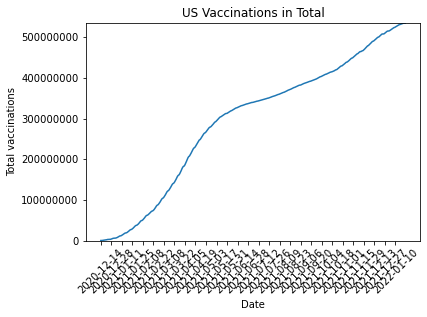

In [14]:
#Plots the graph of US Total Vaccinations. 
#Graph plots points from December 12 2020 to July 24 2021
#MATPLOTLIB GRAPH

x = US_data["date"]
y = US_data["total_vaccinations"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.ylim(0,max(y))
plt.title("US Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total vaccinations")

plt.show()

Text(0, 0.5, 'Total Vaccinations')

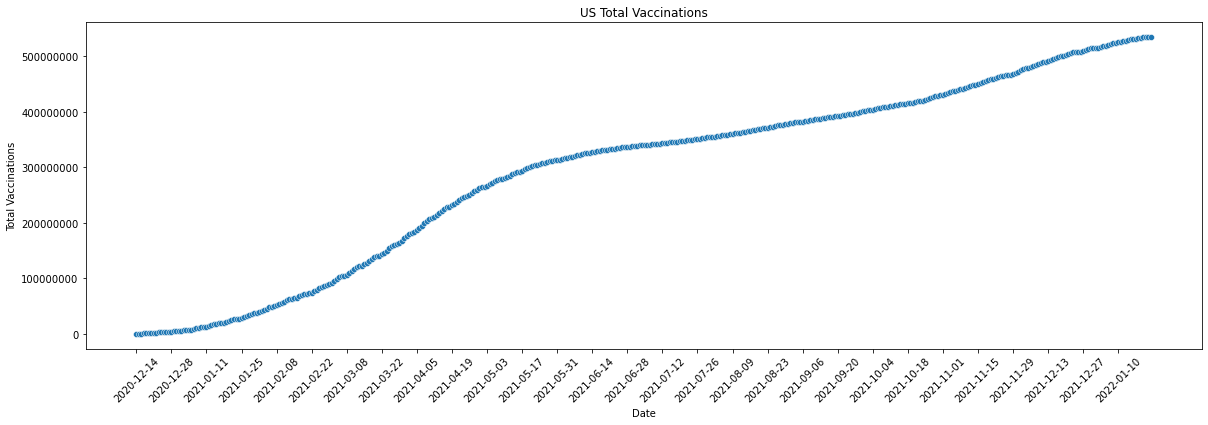

In [15]:
#SEABORN GRAPH

plt.figure(figsize = (20,6))
plt.title("US Total Vaccinations")
sns.scatterplot(x = US_data['date'], y = US_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [16]:
list(vaccine_data.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

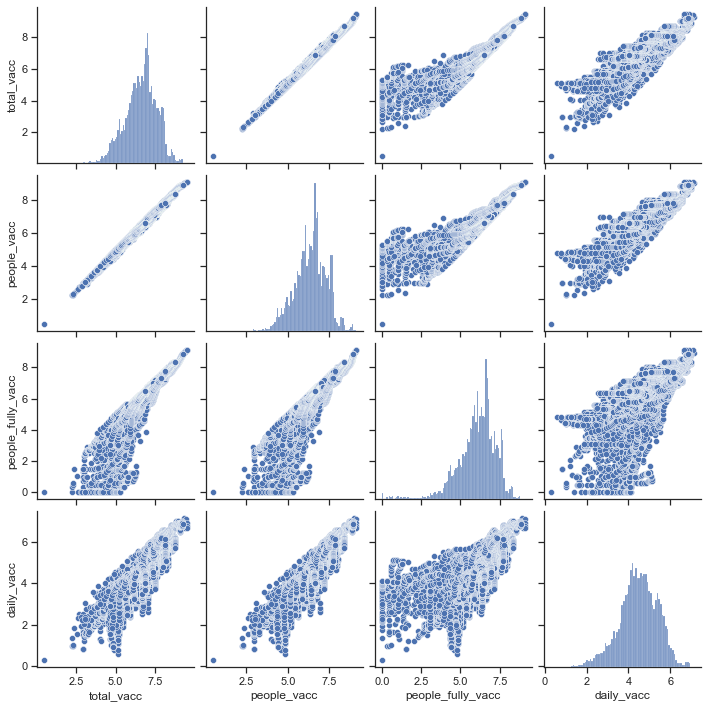

In [17]:
#Plotting scatterplot matrix using Seaborn 
#create dataframe with important features.
clean_vaccine_data['total_vacc'] = np.log10(clean_vaccine_data['total_vaccinations'])
clean_vaccine_data['people_vacc'] = np.log10(clean_vaccine_data['people_vaccinated'])
clean_vaccine_data['people_fully_vacc'] = np.log10(clean_vaccine_data['people_fully_vaccinated'])
clean_vaccine_data['daily_vacc'] = np.log10(clean_vaccine_data['daily_vaccinations'])

#drop the original nontransformed columns
clean_vaccine_data = clean_vaccine_data.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = clean_vaccine_data[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)


In [18]:
# Lets us see which countries we can pick to make a world progress map
list(clean_vaccine_data.country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India'

In [19]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]

#Subsets Mexico data from the original data set.
Mexico_data = sub_data.loc[sub_data["country"] == "Mexico"]

#Subsets Canada data from the original data set.
Canada_data = sub_data.loc[sub_data["country"] == "Canada"]

#Subsets UK data from the original data set.
UK_data = sub_data.loc[sub_data["country"] == "United Kingdom"]

#Subsets China data from the original data set.
China_data = sub_data.loc[sub_data["country"] == "China"]

#Subsets India data from the original data set.
India_data = sub_data.loc[sub_data["country"] == "India"]

In [20]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, China_data, India_data], axis = 0)

# a quick check to see if selected 3 columns are present and 5 countires are present in the country column
#world_countries['country'].unique()
#world_countries.columns


## With close inspectation we see that there is are few distinct data point for China. This would mean further analysis of the data should be done to discover why China does not have a steady line present like the other countries. This could mean the data was not provided or an error had occured during the data cleaning process.

Text(0, 0.5, 'Total Vaccinations')

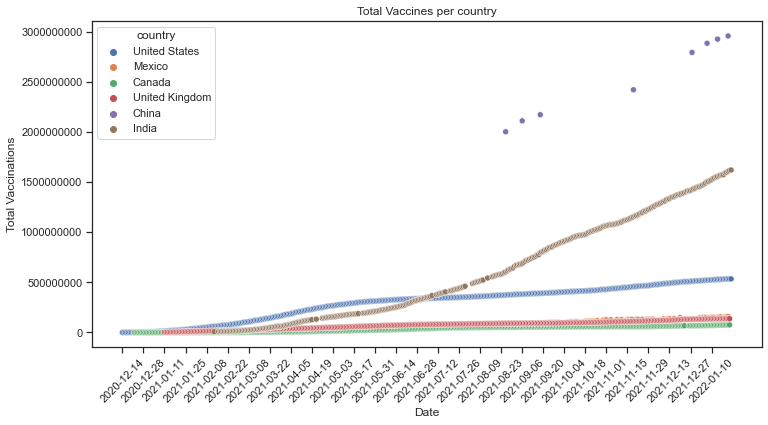

In [21]:
# Scatterplot
plt.figure(figsize = (12,6))
plt.title("Total Vaccines per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
#plt.legend()

In [22]:
len(China_data['date'])

8

In [23]:
temp = vaccine_data.loc[vaccine_data['country'] == 'China']
temp_data = temp[['date', 'country', 'total_vaccinations']]

y = temp_data.isnull().sum()
y
#temp_data.shape


date                   0
country                0
total_vaccinations    85
dtype: int64

## As it turns out, this was an error in the data cleaning step using sub dataframe instead of original dataframe

Text(0, 0.5, 'Total Vaccinations')

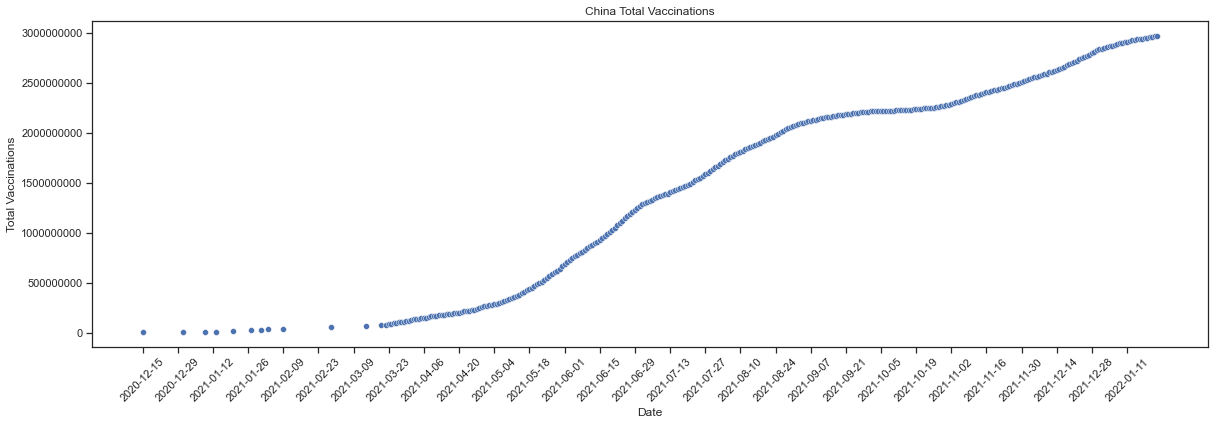

In [24]:
plt.figure(figsize = (20,6))
plt.title("China Total Vaccinations")
sns.scatterplot(x = temp_data['date'], y = temp_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [25]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, temp_data, India_data], axis = 0)
world_countries.head()

,country,date,total_vaccinations
68900,United States,2020-12-14,30565.0
68901,United States,2020-12-15,79799.0
68902,United States,2020-12-16,239125.0
68903,United States,2020-12-17,511425.0
68904,United States,2020-12-18,926720.0


Text(0, 0.5, 'Total Vaccinations')

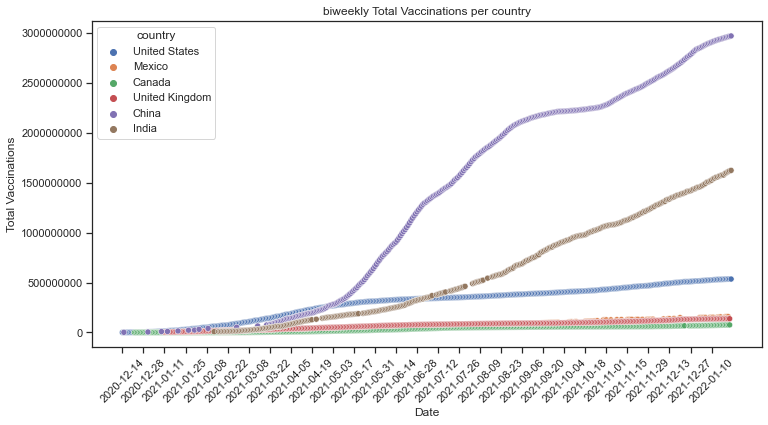

In [26]:
# Scatterplot
plt.figure(figsize = (12,6))
plt.title("biweekly Total Vaccinations per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [27]:
US_covid_cases.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [28]:
US_covid_cases.tail()

,date,cases,deaths
736,2022-01-26,72896986,874733
737,2022-01-27,73426801,877824
738,2022-01-28,73964980,881617
739,2022-01-29,74211771,882964
740,2022-01-30,74328530,883370


In [29]:
US_covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    741 non-null    object
 1   cases   741 non-null    int64 
 2   deaths  741 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.5+ KB


In [30]:
US_covid_cases.isnull().sum()

date      0
cases     0
deaths    0
dtype: int64

In [31]:
US_covid_cases.nunique()

date      741
cases     721
deaths    702
dtype: int64

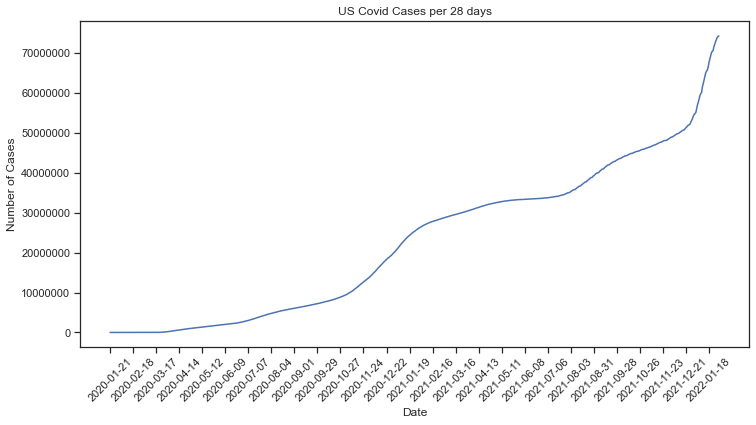

In [32]:
# Number of total cases in the US.
plt.figure(figsize = (12,6))
plt.title("US Covid Cases per 28 days")
plt.xlabel("Date")
plt.ylabel("Number of Cases")

x = US_covid_cases['date']
y = US_covid_cases['cases']
sns.lineplot(x = x, y = y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)
plt.show()

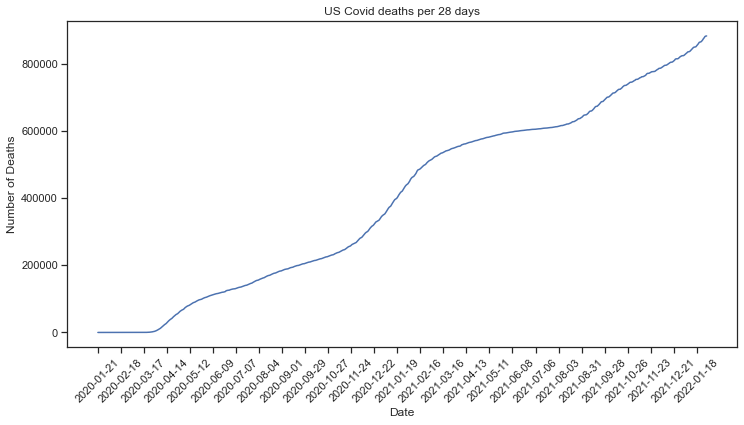

In [33]:
# Number of deaths per day
plt.figure(figsize = (12,6))
plt.title("US Covid deaths per 28 days")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")

x = US_covid_cases['date']
y = US_covid_cases['deaths']
sns.lineplot(x = x, y = y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)
plt.show()

In [34]:
#imports all the libraries needed for the data cleaning and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
#Reads in the csv file and puts the data in a dataframe
vaccine_data = pd.read_csv(r"C:\Users\delva\OneDrive\Desktop\Data Science\Projects\datasets\country_vaccinations.csv")
US_cases = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [36]:
US_cases.tail()

,date,cases,deaths
736,2022-01-26,72896986,874733
737,2022-01-27,73426801,877824
738,2022-01-28,73964980,881617
739,2022-01-29,74211771,882964
740,2022-01-30,74328530,883370


In [37]:
#Checks shape of the data
US_cases.shape

(741, 3)

In [50]:
# Checks for any null values
US_cases.isnull().sum()

date      0
cases     0
deaths    0
dtype: int64

## Plotting the number of cases and number of deaths on the same graph.

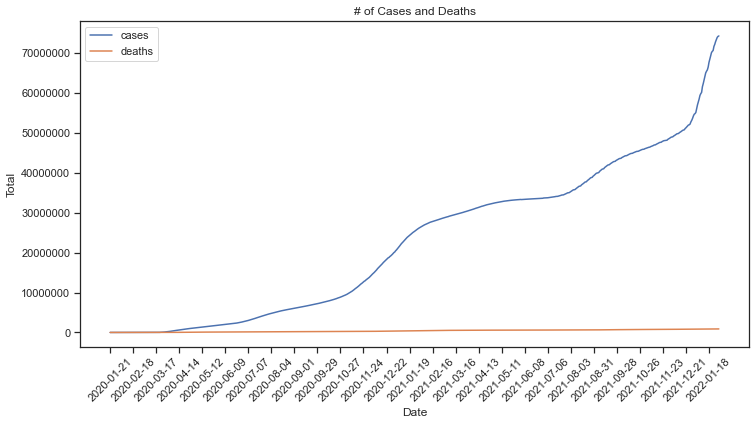

In [51]:
plt.figure(figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('# of Cases and Deaths')


dates = US_cases['date']
cases = US_cases['cases']
deaths = US_cases['deaths']

plt.plot(dates, cases, label = 'cases')
plt.plot(dates, deaths, label = 'deaths')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)

plt.legend()
plt.show()

## Based on the graph above, we can see that the growth of the cases far exceeds the growth of the deaths. Its probably better to split the graphs into two instead. However we can also perform a log transformation to scale it better. 

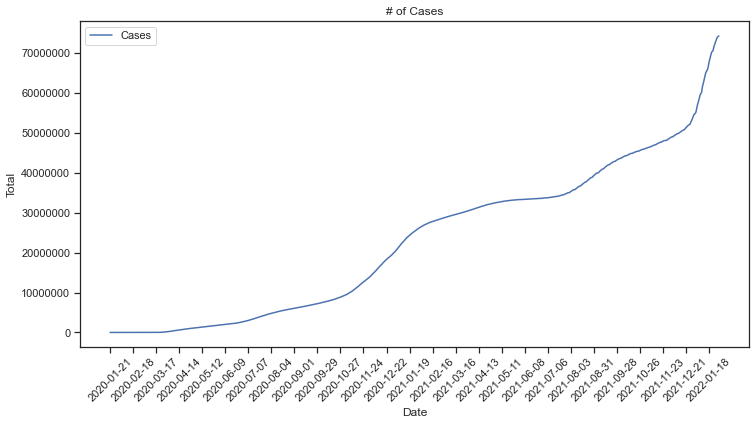

In [52]:
plt.figure(figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('# of Cases')


dates = US_cases['date']
cases = US_cases['cases']

plt.plot(dates, cases, label = 'Cases')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)

plt.legend()
plt.show()

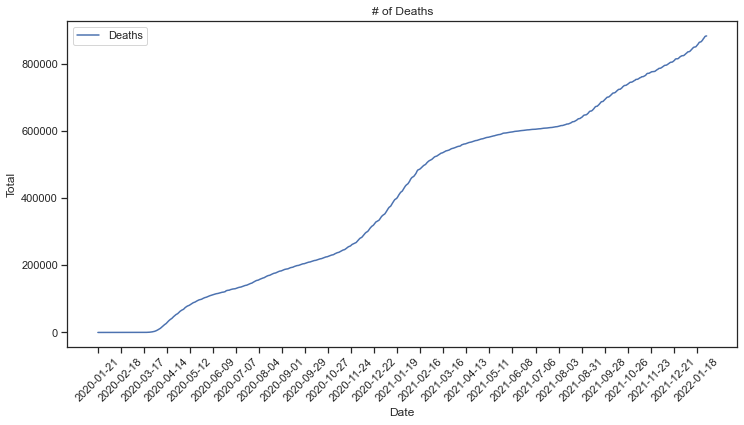

In [53]:
plt.figure(figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('# of Deaths')


dates = US_cases['date']
deaths = US_cases['deaths']

plt.plot(dates, deaths, label = 'Deaths')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)

plt.legend()
plt.show()

## After the log10 transformation we can get a better view of each growth. We can see that  after the growth was stabalized.

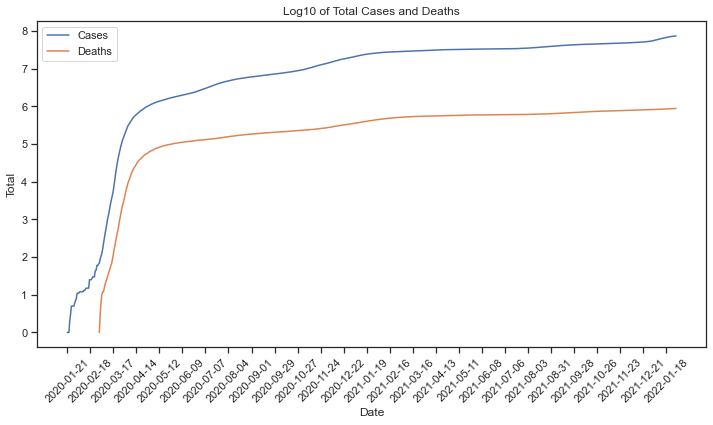

In [55]:
plt.figure(figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Log10 of Total Cases and Deaths')


dates = US_cases['date']
cases = np.log10(US_cases['cases'])
deaths = np.log10(US_cases['deaths'])

plt.plot(dates, cases, label = 'Cases')
plt.plot(dates, deaths, label = 'Deaths')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0,len(x), step = 28), rotation = 45)

plt.legend()
plt.show()